In [1]:
!git config --global user.email "meganebg17@gmail.com"
!git config --global user.name "Megane-b"

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import csv

pathroot = '/home/megane/Documents/0. M1 Neurosciences/17. DESU/rochet/en.openfoodfacts.org.products.csv.gz'


In [30]:
data = pd.read_csv(pathroot, nrows=100000, sep='\t', encoding='utf-8')
data = data[data['nutriscore_grade'].notna()]

/tmp/ipykernel_81681/842744083.py:1: DtypeWarning: Columns (11,34,36) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv(pathroot, nrows=100000, sep='\t', encoding='utf-8')


In [31]:
len(data)

99495

In [32]:
df=data.copy()

In [33]:
duplicates = df.duplicated()
print(f"Number of duplicate rows: {duplicates.sum()}")
df = df.drop_duplicates(keep='first')
len(df)

Number of duplicate rows: 0


99495

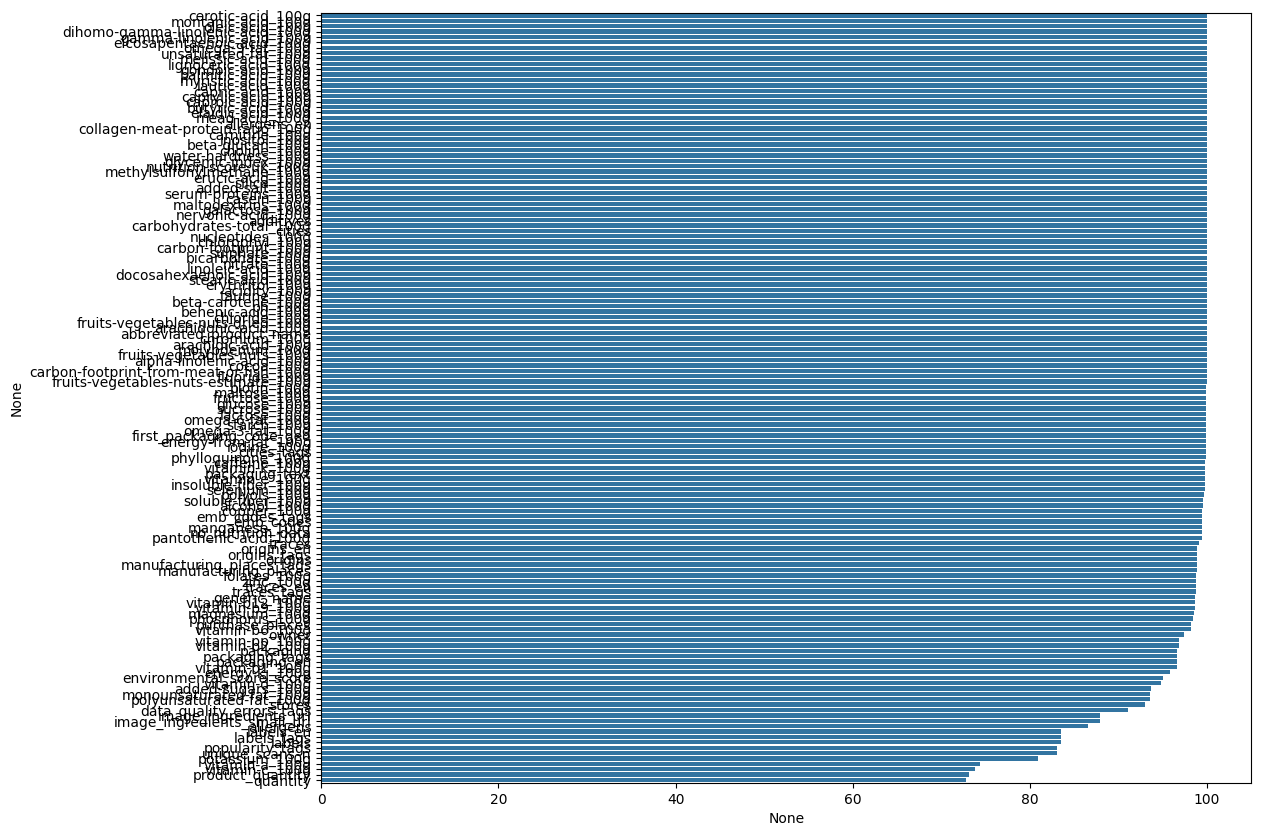

In [ ]:
percent_missing = df.isnull().sum() * 100 / len(df)
percent_missing.sort_values(ascending=False,inplace=True)
threshold_view = 70

filtered = percent_missing[percent_missing.values > threshold_view]

plt.figure(figsize=(12, 10))
ax = sns.barplot(x = filtered, y = filtered.index, orient='h');




In [44]:

from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder

# Encodage
#enc = OrdinalEncoder(handle_unknown='ignore', sparse_output=False)
#enc.fit(df[good_cats])

enc=OrdinalEncoder(categories = 'auto', handle_unknown='use_encoded_value', unknown_value=-1)
enc.fit(df[good_cats])

encoded = enc.transform(df[good_cats])
encoded_names = enc.get_feature_names_out(good_cats)

encoded_df = pd.DataFrame(encoded, columns=encoded_names, index=df.index)

# 1. Sélection des colonnes numériques originales
numeric_cols = df.select_dtypes(include=['int64', 'float64'])

# 2. Concaténation avec les colonnes encodées
final_df = pd.concat([numeric_cols, encoded_df], axis=1)

final_df.head()

print(f'Nombre de colonnes total : {len(final_df.columns)}')
print(f'Nombre de colonnes numériques : {len(numeric_cols.columns)}')
print(f'Nombre de colonnes catégorielles encodées : {len(encoded_df.columns)}')
print(f'Nombre de lignes : {len(final_df)}')

print(final_df.info())
#enlever les colonnes qui ne contiennent aucune valeur
final_df2 = final_df.dropna(axis=1, how='all')
# Afficher les informations du DataFrame final
print(final_df2.info())
final_df2.head(5)  

Nombre de colonnes total : 141
Nombre de colonnes numériques : 138
Nombre de colonnes catégorielles encodées : 3
Nombre de lignes : 99495
<class 'pandas.core.frame.DataFrame'>
Index: 99495 entries, 0 to 99999
Columns: 141 entries, code to pnns_groups_2
dtypes: float64(137), int64(4)
memory usage: 107.8 MB
None
<class 'pandas.core.frame.DataFrame'>
Index: 99495 entries, 0 to 99999
Data columns (total 100 columns):
 #   Column                                                 Non-Null Count  Dtype  
---  ------                                                 --------------  -----  
 0   code                                                   99495 non-null  int64  
 1   created_t                                              99495 non-null  int64  
 2   last_modified_t                                        99495 non-null  int64  
 3   last_updated_t                                         99495 non-null  int64  
 4   serving_quantity                                       61271 non-null  flo

,code,created_t,last_modified_t,last_updated_t,serving_quantity,additives_n,nutriscore_score,nova_group,environmental_score_score,product_quantity,...,carbon-footprint_100g,carbon-footprint-from-meat-or-fish_100g,nutrition-score-fr_100g,phylloquinone_100g,sulphate_100g,nitrate_100g,acidity_100g,nutriscore_grade,pnns_groups_1,pnns_groups_2
0,54,1582569031,1733085204,1740205422,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0,10.0,39.0
1,63,1673620307,1750061386,1750061386,80.0,0.0,NaN,NaN,NaN,80.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0,10.0,39.0
2,114,1580066482,1751035658,1751035658,NaN,NaN,NaN,NaN,NaN,80.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0,10.0,39.0
3,105,1572117743,1738073570,1743653496,5.0,2.0,NaN,4.0,NaN,750.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0,1.0,2.0
4,2,1722606455,1749171851,1749171851,35.0,0.0,NaN,NaN,NaN,400.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,10.0,39.0


In [ ]:

from sklearn.preprocessing import OneHotEncoder



# Encodage
enc = OrdinalEncoder(handle_unknown='ignore', sparse_output=False, drop)
enc.fit(final_df[])

#enc=OrdinalEncoder(categories = 'auto', handle_unknown='use_encoded_value', unknown_value=-1)
#enc.fit(df[good_cats])

encoded = enc.transform(df[good_cats])
encoded_names = enc.get_feature_names_out(good_cats)

encoded_df = pd.DataFrame(encoded, columns=encoded_names, index=df.index)

# 1. Sélection des colonnes numériques originales
numeric_cols = df.select_dtypes(include=['int64', 'float64'])

# 2. Concaténation avec les colonnes encodées
final_df = pd.concat([numeric_cols, encoded_df], axis=1)

final_df.head()

print(f'Nombre de colonnes total : {len(final_df.columns)}')
print(f'Nombre de colonnes numériques : {len(numeric_cols.columns)}')
print(f'Nombre de colonnes catégorielles encodées : {len(encoded_df.columns)}')
print(f'Nombre de lignes : {len(final_df)}')

print(final_df.info())
#enlever les colonnes qui ne contiennent aucune valeur
final_df2 = final_df.dropna(axis=1, how='all')
# Afficher les informations du DataFrame final
print(final_df2.info())
final_df2.head(5)  

In [42]:
from sklearn.ensemble import IsolationForest
from matplotlib.lines import Line2D

model = IsolationForest(contamination=0.05, random_state=42)
preds = model.fit_predict(final_df2)
outlier_indices = np.where(preds == -1)[0]
print(f"Outliers : {len(outlier_indices)} on {len(final_df2)} total samples")
print (f'Pourcentage d\'outliers : {len(outlier_indices) / len(final_df2) * 100:.2f}%')
cmap = sns.color_palette("pastel")

plt.figure(figsize=(8, 8))
palette = {1: cmap[0], -1: cmap[3]}
pax = sns.scatterplot(
    x=final_df2['additives_n'],
    y=final_df2['nutriscore_grade'],
    hue=preds,
    palette=palette,
    edgecolor='k',
    s=60,
    legend=False
)
plt.xlabel('\nadditifs', fontsize=20)
plt.ylabel('nutriscore\n', fontsize=20)
plt.title("Scatter plot of \nadditifs vs nutriscore \n", fontsize=22, fontweight='bold')
axes = plt.gca()
axes.spines['top'].set_visible(False)
axes.spines['right'].set_visible(False)

legend_elements = [
    Line2D([0], [0], marker='o', color='w', label='Inlier', markerfacecolor=cmap[0], markersize=12, markeredgecolor='k'),
    Line2D([0], [0], marker='o', color='w', label='Outlier', markerfacecolor=cmap[3], markersize=12, markeredgecolor='k')
]
plt.legend(handles=legend_elements, title="Valeurs", fontsize=15, title_fontsize=15, frameon=True, loc='upper right', bbox_to_anchor=(0.08, 1.2), framealpha=0.8, edgecolor='black')
plt.tight_layout()
plt.savefig('freetime_vs_G3_outliers.png', dpi=300, bbox_inches='tight', transparent=True)
plt.show()

Outliers : 4922 on 99495 total samples
Pourcentage d'outliers : 4.95%


KeyError: 'nutriscore_grade'

<Figure size 800x800 with 0 Axes>

In [37]:
df_clean = final_df2[~final_df2.index.isin(outlier_indices)]
print(f"Nombre d'outliers = {len(outlier_indices)}")
print(f"DataFrame propre des outliers: {df_clean.shape[0]} lignes restantes sur {final_df2.shape[0]} lignes initiales")
df_clean

Nombre d'outliers = 4922
DataFrame propre des outliers: 94592 lignes restantes sur 99495 lignes initiales


,code,created_t,last_modified_t,last_updated_t,serving_quantity,additives_n,nutriscore_score,nova_group,environmental_score_score,product_quantity,...,pnns_groups_2_Salty and fatty products,pnns_groups_2_Sandwiches,pnns_groups_2_Soups,pnns_groups_2_Sweetened beverages,pnns_groups_2_Sweets,pnns_groups_2_Teas and herbal teas and coffees,pnns_groups_2_Unsweetened beverages,pnns_groups_2_Vegetables,pnns_groups_2_Waters and flavored waters,pnns_groups_2_unknown
0,54,1582569031,1733085204,1740205422,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,63,1673620307,1750061386,1750061386,80.0,0.0,NaN,NaN,NaN,80.00000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,114,1580066482,1751035658,1751035658,NaN,NaN,NaN,NaN,NaN,80.00000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,105,1572117743,1738073570,1743653496,5.0,2.0,NaN,4.0,NaN,750.00000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2,1722606455,1749171851,1749171851,35.0,0.0,NaN,NaN,NaN,400.00000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,23545205501,1676917269,1676917274,1738819276,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
99996,23545205730,1489068685,1740274601,1740274601,42.0,0.0,1.0,1.0,NaN,42.00000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
99997,23545205822,1663952455,1680203965,1734702506,NaN,NaN,-3.0,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
99998,23545205846,1675006113,1675064304,1738818713,NaN,NaN,NaN,NaN,NaN,907.18474,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Gardons les outliers

In [38]:
#enlevons des colonnes qui ne sont pas pertinentes
df_clean_cut = df_clean.drop(columns=['code', 'created_t', 'last_modified_t', 'last_modified_t', 'last_update_t', 'serving_quantity'], errors='ignore')
print(df_clean.shape)
print(df_clean_cut.shape)                         

(94592, 155)
(94592, 151)


In [41]:
from sklearn.feature_selection import SelectKBest, chi2, f_regression
X = df_clean_cut.columns[df_clean_cut.columns != 'nutriscore_grade']
y = df_clean_cut['nutriscore_grade']

# Sélection des k meilleures variables explicatives (par exemple k=50)
k = 20
selector = SelectKBest(score_func=chi2, k=k)
X_kbest = selector.fit_transform(X, y)

# Pour obtenir les noms des colonnes sélectionnées (si X est un DataFrame)
selected_columns = X.columns[selector.get_support()]
print("Colonnes sélectionnées :", list(selected_columns))

KeyError: 'nutriscore_grade'

In [22]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.regularizers import l2
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
import os
from IPython.display import display, HTML
from matplotlib.lines import Line2D
import xgboost as xgb
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)
warnings.filterwarnings("ignore", category=UserWarning)
import shap

from sklearn.preprocessing import LabelEncoder

2025-07-10 16:03:48.685934: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-07-10 16:03:48.691531: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-07-10 16:03:48.702740: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1752156228.719807   81681 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1752156228.724573   81681 cuda_blas.cc:1407] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
W0000 00:00:1752156228.738044   81681 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linkin

In [ ]:
#faisons un kbest
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.pipeline import Pipeline

In [12]:
from sklearn.impute import KNNImputer

imputer = KNNImputer(n_neighbors=5)
final_df2_sans_na_array = imputer.fit_transform(df_clean)
final_df2_sans_na = pd.DataFrame(final_df2_sans_na_array, columns=df_clean.columns)
final_df2_sans_na

KeyboardInterrupt: 

: 

: 

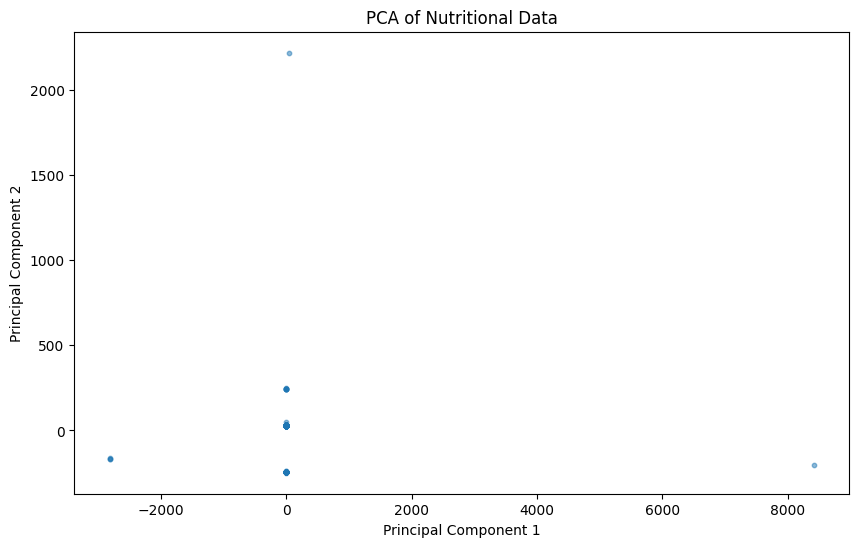

In [13]:
from sklearn.impute import KNNImputer
from sklearn.preprocessing import RobustScaler
from sklearn.decomposition import PCA

# 1. Imputation sur données brutes
imputer = KNNImputer(n_neighbors=5)
X_imputed = imputer.fit_transform(final_df2)

# 2. Scaling (RobustScaler ou autre)
scaler = RobustScaler()
X_scaled = scaler.fit_transform(X_imputed)

# 3. PCA
pca = PCA(n_components=50)
X_pca = pca.fit_transform(X_scaled)

#plot
plt.figure(figsize=(10, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], alpha=0.5, s=10)
plt.title('PCA of Nutritional Data')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()


In [ ]:
bins = [-1, 5, 10, 15, 20]
labels = [0, 1, 2, 3]

feature_names = final_df2_sans_na.columns[final_df2_sans_na.columns != 'nutriscore_score']

y_grouped = pd.cut(final_df2_sans_na['nutriscore_score'], bins=bins, labels=labels)

# Supprime les lignes où y_grouped est NaN
mask = ~y_grouped.isna()
y_grouped = y_grouped[mask].astype(int)

# Sélection lignes avec mask
X_filtered = df_robust_avec_out[mask.values, :]  # toutes les colonnes

# Sélection colonnes dans un second temps
col_indices = final_df2_sans_na.columns.get_indexer(feature_names)
X_selected = X_filtered[:, col_indices]

# Création DataFrame
X_df = pd.DataFrame(X_selected, columns=feature_names)

# Labels
y = y_grouped[mask].astype(int).values


feature_names = final_df2_sans_na.columns[final_df2_sans_na.columns != 'nutriscore_score']
X_df = pd.DataFrame(df_robust_avec_out[:, final_df2_sans_na.columns.get_indexer(feature_names)], columns=feature_names)
y = y_grouped.values


X_train, X_test, y_train, y_test = train_test_split(X_df, y, train_size=0.8, random_state=42)

dtrain = xgb.DMatrix(X_train, label=y_train, feature_names=list(feature_names))
dtest = xgb.DMatrix(X_test, label=y_test, feature_names=list(feature_names))

params = {
    'objective': 'multi:softmax',
    'eval_metric': 'merror',
    'num_class': 4,
    'max_depth': 5,
    'eta': 0.1,
    'subsample': 0.8,
    'colsample_bytree': 0.8,
    'min_child_weight': 1,
    'gamma': 0,
    'alpha': 0.1,
    'lambda': 1
}

cv_results = xgb.cv(
    params, 
    dtrain, 
    num_boost_round=200, 
    nfold=5, 
    metrics='merror',
    early_stopping_rounds=20,
    verbose_eval=False
)

best_rounds = cv_results['test-merror-mean'].argmin() + 1
print(f"Best number of rounds: {best_rounds}")

model = xgb.train(params, dtrain, num_boost_round=best_rounds)

predictions = model.predict(dtest)
accuracy = accuracy_score(y_test, predictions)
print(f'XGBoost Accuracy: {accuracy:.4f}')

cm = confusion_matrix(y_test, predictions)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['0–5', '6–10', '11–15', '16–20'],
            yticklabels=['0–5', '6–10', '11–15', '16–20'])
plt.xlabel('Note Prédite')
plt.ylabel('Note Réelle')
plt.title('Matrice de confusion - XGBoost')
plt.tight_layout()
plt.savefig('confusion_matrix_xgboost.png', dpi=300, bbox_inches='tight', transparent=True)
plt.show()

importances = model.get_score(importance_type='gain')
df_importance = pd.DataFrame(importances.items(), columns=['feature', 'importance'])
df_importance = df_importance.sort_values(by='importance', ascending=False)

df_bis = df_importance[2:]
palette = sns.color_palette("pastel", len(df_importance)) 
feature_colors = dict(zip(df_importance['feature'], palette))

plt.figure(figsize=(12, 8))
sns.barplot(
    data=df_importance,
    y='feature',
    x='importance',
    hue='feature',
    palette=feature_colors,
    dodge=False,
    legend=False
)

plt.title('Importance des variables sur les résultats en maths\n', fontsize=22, fontweight='bold')
plt.xlabel('\nGain moyen', fontsize=20) 
plt.ylabel('Features\n', fontsize=20)
plt.grid(False)
axes = plt.gca()
axes.spines['top'].set_visible(False)
axes.spines['right'].set_visible(False)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.tight_layout()
plt.savefig('feature_importance_xgboost.png', dpi=300, bbox_inches='tight', transparent=True)
plt.show()

print(f"XGBoost Accuracy: {accuracy:.4f}")




ValueError: Found input variables with inconsistent numbers of samples: [1000, 682]

In [45]:
print(df_robust_avec_out.shape)
print(final_df2.shape)
print(len(mask))
print(mask.sum())


(1000, 606)
(1000, 606)
1000
62
